In [1]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random,os
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import keras
from keras import backend as K


import string
characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len, n_class = 160, 80, 4, len(characters)


generator = ImageCaptcha(width=width, height=height)
# for i in range(1000):
#     random_str = ''.join([random.choice(characters) for j in range(4)])
#     img = generator.generate_image(random_str)
#     img.save('./pic/'+str(i) +'_'+ random_str + '.jpg')

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Using TensorFlow backend.


In [128]:
from keras.preprocessing.image import img_to_array,load_img
import numpy as np
from keras.layers import *
from keras.models import Model
import cv2 as cv

imgs = []
labels =[]
temp = [[] for i in range(4)]


def deal_img(img):
#     img = load_img(path,grayscale=True)
    img = img_to_array(img).astype(np.uint8)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
    img= cv.bilateralFilter(img,9,75,75)
    img = cv.Canny(img, 100, 200)
    return img.reshape(height,width,1)

def gen(batch_size=32):
    while True:
        imgs=[]
        labels = []
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            img = generator.generate_image(random_str)
            img = deal_img(img)
            imgs.append(img)
            y=np.zeros((len(characters)*4))
            for i,char in enumerate(random_str):
                y[characters.find(char)+i*len(characters)] = 1
            labels.append(y)   
        train_x = np.array(imgs)
        train_y = np.array(labels)
        yield train_x, train_y
    

# def deal_img(path):
#     img = load_img(path,grayscale=True)
#     img = img_to_array(img).astype(np.uint8)
#     img= cv.bilateralFilter(img,9,75,75)
#     img = cv.Canny(img, 100, 200)
#     return img.reshape(height,width,1)/255

# for f in os.listdir('./pic/')[:500]:
# #     print(type(f))
#     if f.endswith('jpg'):
#         img = deal_img('./pic/'+f)
#         imgs.append(img)
#         string = f.split('.')[0].split('_')[1]
#         y=np.zeros((len(characters)*4))
#         for i,char in enumerate(string):   
# #             y=np.zeros((36))
# #             y[characters.find(char)] = 1
# #             temp[i].append(y)
#             y[characters.find(char)+i*len(characters)] = 1
#         labels.append(y)
# # train_y = [np.array(i) for i in temp]
# train_y = np.array(labels)
# print(train_y.shape)
# # print(imgs[0].shape)
# train_x = np.array(imgs)
# # print(len(labels))
# # train_y = labels
# # train_y = np.array(labels)
        
# input_tensor = Input((height, width, 1))
# x = input_tensor
# x = Conv2D(64, (3, 3), activation='relu', padding='SAME')(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='SAME')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# x = Conv2D(128, (3, 3), activation='relu', padding='SAME')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='SAME')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# # x = Conv2D(256, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(256, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(256, (3, 3), activation='relu', padding='SAME')(x)
# # x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = MaxPooling2D((2, 2),strides=(2,2), padding='SAME', name='block4_pool')(x)

# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# x = Flatten()(x)
# x = Dense(1024,activation='relu')(x)
# # x = Dense(1024,activation='relu')(x)

# # x = Dropout(0.3)(x)
# x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
# x = concatenate(x)

# model = Model(inputs=input_tensor, outputs=x)



input_tensor = Input( shape=(height, width, 1))
x = input_tensor

#构建卷积网络
#两层卷积层，一层池化层，重复3次。因为生成的验证码比较小，padding使用same
x = Convolution2D(32, 3, padding='same', activation='relu')(input_tensor)
x = Convolution2D(32, 3, padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)


x = Convolution2D(64, 3, padding='same', activation='relu')(x)
x = Convolution2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Convolution2D(128, 3, padding='same', activation='relu')(x)
x = Convolution2D(128, 3, padding='same',activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。
x = Flatten()(x)
#为输入数据施加Dropout。Dropout将在训练过程中每次更新参数时随机断开一定百分比（rate）的输入神经元，Dropout层用于防止过拟合。
# x = Dense(128,activation='relu')(x)
# x = Dense(128,activation='relu')(x)
x = Dropout(0.25)(x)


#Dense就是常用的全连接层
#最后连接5个分类器，每个分类器是46个神经元，分别输出46个字符的概率。
x = [Dense(len(characters), activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
output = concatenate(x)
model = Model(inputs=input_tensor, outputs=output)
    


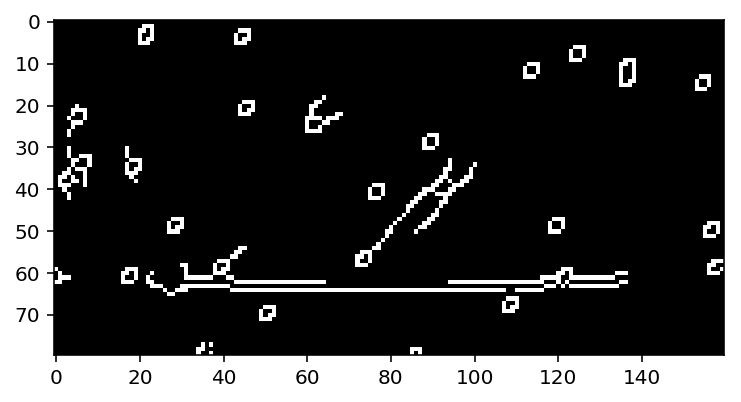

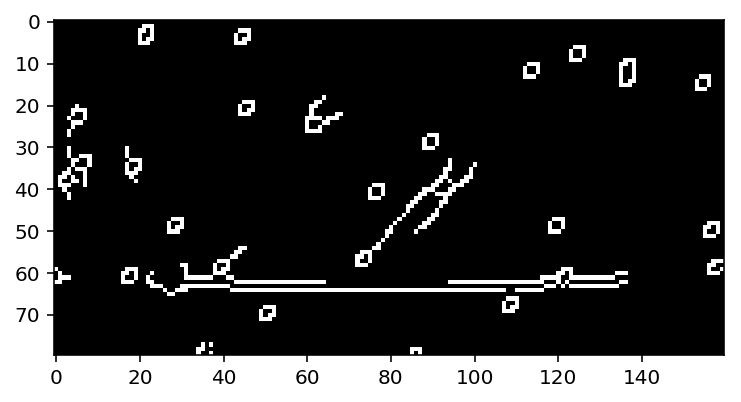

In [129]:
img,y = next(gen(1))
np.set_printoptions(threshold=np.inf)
img1 = np.copy(img)
img1[img<150]=0
img1[img>220]=255
plt.imshow(img.reshape((80,160)),cmap='gray')
plt.figure()
plt.imshow(img1.reshape((80,160)),cmap='gray')

# img[0][20]

In [130]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 80, 160, 1)   0                                            
__________________________________________________________________________________________________
conv2d_85 (Conv2D)              (None, 80, 160, 32)  320         input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 80, 160, 32)  9248        conv2d_85[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_31 (MaxPooling2D) (None, 40, 80, 32)   0           conv2d_86[0][0]                  
__________________________________________________________________________________________________
conv2d_87 

In [ ]:
tf_session = K.get_session()

def my_acc(y_true, y_pred):
    predict = tf.reshape(y_pred, [-1, n_len, len(characters)])
    max_idx_p = tf.argmax(predict, 2)
    max_idx_l = tf.argmax(tf.reshape(y_true, [-1,n_len, len(characters)]), 2)
    correct_pred = tf.reduce_all(tf.equal(max_idx_p, max_idx_l),axis=1)
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32))

def my_loss(y_true, y_pred):
    predict = tf.reshape(y_pred, [-1, n_len, len(characters)])
    y_true = tf.reshape(y_true, [-1, n_len, len(characters)])
    a,b = [[] for i in range(n_len)],[[] for i in range(n_len)]
    loss=0
    for i in range(n_len):
        a[i] = tf.reshape(predict[:,i,:],(-1,len(characters)))
        b[i] = tf.reshape(y_true[:,i,:],(-1,len(characters)))
        loss += K.categorical_crossentropy(a[i],b[i])
    
#     max_idx_p,max_idx_l = [[] for i in range(n_len)],[[] for i in range(n_len)]
#     for i in range(n_len):
#         max_idx_p[i] = K.one_hot(tf.argmax(predict, 2)[:,i],len(characters))
#         max_idx_l[i] = K.one_hot(tf.argmax(tf.reshape(y_true, [-1,n_len, len(characters)]), 2)[:,i],len(characters))
#         loss+= K.categorical_crossentropy(max_idx_p[i],max_idx_l[i])
#     return loss

#     max_idx_p = K.one_hot(tf.argmax(predict, 2),len(characters))
#     max_idx_l = K.one_hot(tf.argmax(tf.reshape(y_true, [-1,n_len, len(characters)]), 2),len(characters))
    return loss

optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
model.compile(#loss = my_loss,
              loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[my_acc])
checkpointer = keras.callbacks.ModelCheckpoint(filepath="output/weights.{epoch:02d}--{val_loss:.2f}-{val_my_acc:.4f}.hdf5", 
                               verbose=2, save_weights_only=True)
# for i in range(10):
model.fit_generator(gen(64),steps_per_epoch=10000,epochs=2,verbose=1,validation_data=gen(100),validation_steps=1,callbacks=[checkpointer])

Epoch 1/2
  962/10000 [=>............................] - ETA: 5:31:43 - loss: 15.7696 - my_acc: 0.0696

In [ ]:
def decode_str(result):
    strings =[]
    for s in range(result.shape[0]):
        string = [characters[result[s,i*len(characters):(i+1)*len(characters)].argmax()] for i in range(n_len)]
        strings.append(string)
    return [''.join(string) for string in strings]

In [ ]:
x,y = next(gen(100))
true_label = decode_str(y)

In [21]:
score = model.evaluate(x,y)
result = model.predict(x,batch_size=32,verbose=1)

100/100 [==============================] - 1s 12ms/step


In [22]:
score

[18.930751876831053, 0.41]

In [63]:
def test_acc(true_label, result):
    count = 0
    for i,j in zip(true_label,decode_str(result)):
        if i==j:
            count+=1
    return count/len(true_label)
test_acc(true_label,result)

0.48

In [167]:
true = [train_y[i][0].argmax() for i in range(4)]

In [40]:
''.join([characters[i] for i in true])

'8WZF'